# **About Linear Regression**
Linear regression method is used to estimate the slope and intercept of the straight line.
Formula of Linear regression: 
$$y_{i} = m \cdot x_{i} + c + ϵ_{i}$$

To estimate the value of slope and intercept we will find value of $m$ and $c$ so that the following sum of error(SE) is minimized. Expression for SE is as follows:$$SE = \sum_{i=1}^{n}(y_{i} - m \cdot x_{i} - c)^2$$ where $m$ is slope and $c$ is intercept.To estimate values of $m$ and $c$ use following equations:
$$\frac{∂SE}{∂m} = 0  \quad  and \quad \frac{∂SE}{∂c} = 0$$
Hence calculated values of $m$ and $c$ are:
$$m =\frac{\overline{xy} - \overline{x}⋅\overline{y}}{\overline{x^2} - (\overline{x})^2} \quad \quad and \quad \quad c = \overline{y} - m \cdot \overline{x}$$ Where  $$\overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i}  \quad \quad and \quad \quad \overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_{i} $$

$$!! \quad LINEAR \quad REGRESSION \quad FOR \quad LINEAR \quad EQUATION \quad !!$$
$$y_{i} = m \cdot x_{i} + c + \epsilon_{i}$$ 

In [ ]:
# Importing required modules.
import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [ ]:
# Prompting user to enter required values.
n = int(input("Enter the total number of experiment: "))
m = float(input("enter value of m: "))
c = float(input("enter value of c: "))

Enter the total number of experiment: 150
enter value of m: 5
enter value of c: 20


In [ ]:
# Difining error function to calculate value of error.
def error(alpha, n):
    '''
    Return: The list of custom error values.

    Parameter alpha: It is the number to increase error.
    Precondition: It must be a numeric.

    Parameter n: It is the number of observation.
    Precondition: It must be a numeric.
    '''
    error_list = []
    for i in range(n):
        error_list.append((random.random() - 0.5) * alpha)      # Centralised error about zero.
    return error_list

In [ ]:
# Function to calculate value of slope and intercepts after minimising them.
def minimised(x_list, y_list, n):
    '''
    Returns: The tuple of values of minimised slope(m) and intercept(c).

    Parameter x_list: It is the list of values of x-axis on graph.
    Precondition: It must be a list type containig numeric.

    Parameter y_list: It is the list of values of x-axis on graph.
    Precondition: It must be a list type containig numeric.

    Parameter n: It is the number of observation.
    Precondition: It must be a numeric.
    '''
    # difining variable to store values.
    xy = 0
    y = 0
    x = 0
    xSquare = 0
    for i in range(n):
        y += y_list[i]
        x += x_list[i]
        xSquare += x_list[i] ** 2
        xy += x_list[i] * y_list[i]    
    xyBar = xy / n
    xBar = x / n
    yBar = y / n
    xSquareBar = xSquare / n
    xBarSquare = xBar ** 2
    # Calculating values of m and c using above terms in above mentoned formula for m and c.
    m = (xyBar - xBar * yBar) / (xSquareBar - xBarSquare)
    c = yBar - m * xBar
    return m, c

In [ ]:
# x_list and y_list to plots for random values of m and c.
x_list = [i / 10 for i in range(n)]
alpha = 20        # Error manager.
error_list = error(alpha, n)
y_listExperiment = []
for i in range(n):
    # Using equation of straight line.
    y_listExperiment.append(m * x_list[i] + c +error_list[i])

In [ ]:
# Value for plotting after minimising error.
y_i_analytical = []
newValues = minimised(x_list, y_listExperiment, n)
m = newValues[0]
c = newValues[1]
for i in range(n):
    # err = (random.random() - 0.5) * alpha
    y_i_analytical.append(m * x_list[i] + c)

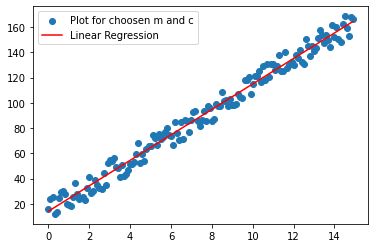

In [ ]:
# Command for drawing graphs.
plt.scatter(x_list, y_listExperiment, label = 'Plot for choosen m and c')
plt.plot(x_list, y_i_analytical, label = 'Linear Regression', color = 'red')
plt.legend()
plt.show()

$$!! \quad LINEAR \quad REGRESSION \quad FOR \quad EXPONENTIAL \quad EQUATION \quad !!$$
$$y_{i} = β\cdot e^{γx_{i} + ϵ_{i}}$$
To solve this by linear regression first of all convert it into linear equation by taking log on both side:$$\log{y_{i}} =  \log{β} + γ\cdot x_{i} + ϵ_{i}$$consider  $ \quad y_{i}^{new}= \log{y_{i}}, \quad c = \log{β} \quad and \quad m = γ$

with this new terms apply linear regression method to find $β$ and $γ$.

In [ ]:
# Prompting user to enter initial values of gama and beta.
gama = float(input("enter value of gama: "))
beta = float(input("enter value of beta: "))

enter value of gama: 5
enter value of beta: 20


In [ ]:
# x_list and y_list to plots for random values of m and c.
x_list = [i / 100 for i in range(n)]
alpha = 0.8   # Error manager.
error_list = error(alpha, n)        # list of error values.
y_listExperiment = []
for i in range(n):
    # conveting exponential to straight line and computing value of log(yi) to calculate value of gama and beta.
    y_listExperiment.append(math.log(beta) + gama * x_list[i] + error_list[i])

In [ ]:
# Collecting values after putting obtained values of gama and beta for error to be minimised.
y_i_analytical = []
newValues = minimised(x_list, y_listExperiment, n)
gama = newValues[0]
beta = math.exp(newValues[1])
for i in range(n):
    y_i_analytical.append(beta * (math.exp(gama * x_list[i])))

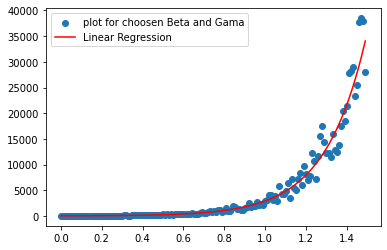

In [ ]:
# Command for drawing graphs.
plt.scatter(x_list, [beta * (math.exp(gama * x_list[i] + error_list[i])) for i in range(n)], label = 'plot for choosen Beta and Gama')
plt.plot(x_list, y_i_analytical, label = 'Linear Regression', color = 'red')
plt.legend()
plt.show()

$$!!\quad LINEAR \quad REGRESSION \quad FOR \quad POLYNOMIAL \quad FUNCTION\quad !!$$
$$y_{i} = m_{0} + m_{1}x_{i} + m_{2}x_{i}^{2} + m_{3}x_{i}^{3} + m_{4}x_{i}^{4} + .....$$
To solve this by linear regression first of all convert into linear equation of multi variable as follows:
$$y_{i} = m_{0} + m_{1}x_{1i} + m_{2}x_{2i} + m_{3}x_{3i} .......$$where  $ \quad x_{1i} = x_{i}, \quad x_{2i} = x_{i}^{2}, x_{3i} = x_{i}^{3} $ and so on.....

Now solve linear equation by using linear regression.

In [ ]:
# Creating list for value of y with experimental error.
degree = int(input('enter the degree of polynomial: '))
valueOfm = [float(input(f'Enter value of m_{i}: ')) for i in range(degree + 1)]   # prompting user to enter value of coffiecints adn constants.
x_list = [i / 10 for i in range(n)]
alpha = 1   # Error manager.
error_list = error(alpha, n)        # list of error values.
y_listExperiment = []
for i in range(n):
    # finding values of m1x, m2x^2, m3x^3 etc.
    y = valueOfm[0]
    for j in range(degree):
        y += valueOfm[j + 1] * x_list[i] ** (j + 1)
    y_listExperiment.append(y + error_list[i])

In [ ]:
# Calculating value of m's after applying linear regression.
finalList = []         # Row vector storing values of finally calculated m.
matrix = []            # matrix of values.
c_vector = []
for p in range(degree * 2 + 1):
    sum = 0
    sum1 = 0
    for i in range(n):
        sum1 += y_listExperiment[i] * x_list[i] ** p
        sum += x_list[i] ** p
    matrix.append(sum)
    if p <= degree:      # It will control the size of column vector upto m.
        c_vector.append([sum1])
for i in range(degree + 1):
    if i > degree:
        break
    finalList.append(matrix[i: degree + 1 + i])

In [ ]:
# Finally checking closeness between choosen values of m's and calculated values of m.
inverse = np.linalg.inv(finalList)              # calculating inverse of matrix.
product = np.dot(inverse, c_vector)      # This is the column vector containing values of calculated m.
for i in range(degree + 1):
    print(f'Choosen values of m_{i}: ', valueOfm[i])
    print(f'Calculated values of m_{i}: ', product[i][0])
    print()

Choosen values of m_0:  36.0
Calculated values of m_0:  36.13128662109375

Choosen values of m_1:  45.0
Calculated values of m_1:  44.969970703125

Choosen values of m_2:  8.0
Calculated values of m_2:  8.002685546875

Choosen values of m_3:  12.0
Calculated values of m_3:  12.00360107421875

Choosen values of m_4:  23.0
Calculated values of m_4:  22.999099731445312

Choosen values of m_5:  54.0
Calculated values of m_5:  54.00007367134094

Choosen values of m_6:  12.0
Calculated values of m_6:  11.999997980892658

